In [18]:
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import uproot 
import mplhep as hep
import hist
import os

from UtilityAndConst import *
from Functions import *

dir = "/Users/francescolarovere/Documents/Tesi-Triennale/Dati"
os.chdir(dir)

hep.style.use("CMS")
np.set_printoptions(threshold=np.inf)

In [19]:
#import Files

LS133 = "./ntupleStubsBmtfGmt_LS133.root"
LS263 = "./ntupleStubsBmtfGmt_LS263.root"
LS264 = "./ntupleStubsBmtfGmt_LS264.root"
LS306 = "./ntupleStubsBmtfGmt_LS306.root"

#Open file
stubs_awk_LS133 = OpenRootFile(LS133, stub_features)
stubs_awk_LS263 = OpenRootFile(LS263, stub_features)
stubs_awk_LS264 = OpenRootFile(LS264, stub_features)
stubs_awk_LS306 = OpenRootFile(LS306, stub_features)

# Filling Scheme 

Prima viene fatta una analisi con tutti e quattro i set di dati separati; notato che non vi è nessuna correlazione evidente si passa a studiare l'istogramma con tutti i dati disponibili

In [20]:
bx_range = np.arange(ONE_ORBIT_IN_BX + 2)

bx_stub_counts_LS133 = np.bincount(stubs_awk_LS133.bx, weights=stubs_awk_LS133.nStubs)
bx_stub_counts_LS263 = np.bincount(stubs_awk_LS263.bx, weights=stubs_awk_LS263.nStubs)
bx_stub_counts_LS264 = np.bincount(stubs_awk_LS264.bx, weights=stubs_awk_LS264.nStubs)
bx_stub_counts_LS306 = np.bincount(stubs_awk_LS306.bx, weights=stubs_awk_LS306.nStubs)

bx_stub_counts = ak.Array([bx_stub_counts_LS133, bx_stub_counts_LS263, bx_stub_counts_LS264, bx_stub_counts_LS306])

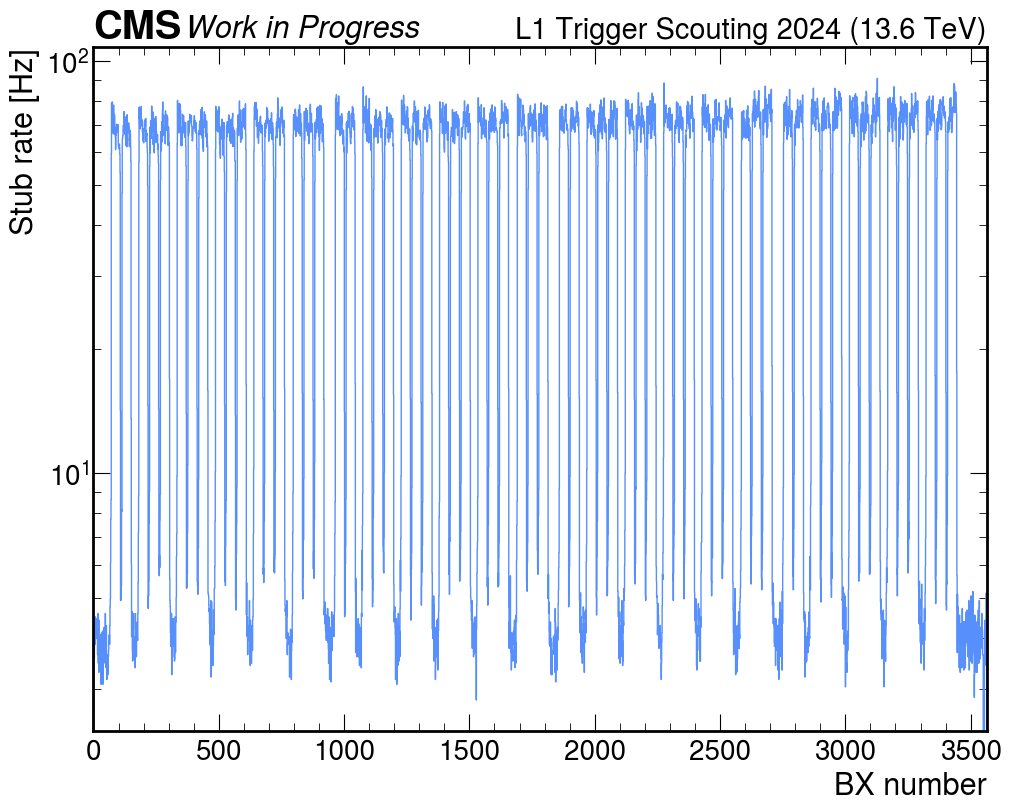

In [21]:
FileNumber = 0

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_stub_counts[FileNumber]), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(0, ONE_ORBIT_IN_BX)
ax.set_yscale('log')


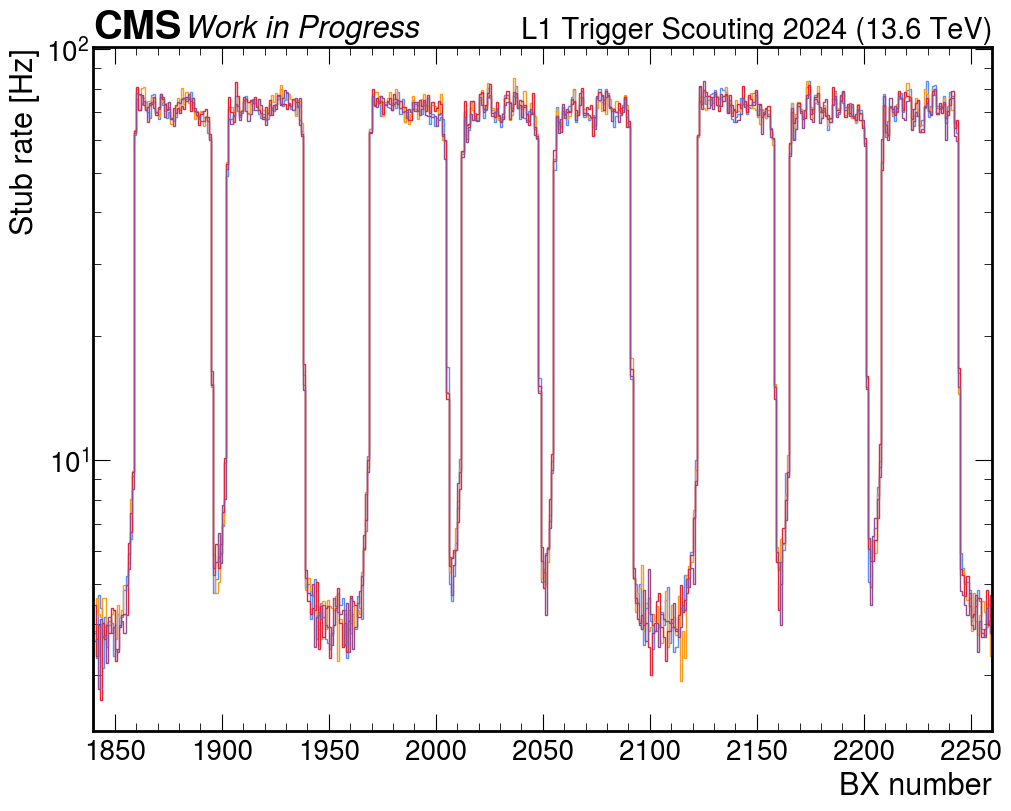

In [22]:
#Zoom in una regione con due treni (?)
FileNumber = 0

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

bx_left = 1840
bx_right = 2260

ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_stub_counts[FileNumber][bx_left:bx_right]), histtype='step')
ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_stub_counts[FileNumber + 1][bx_left:bx_right]), histtype='step')
ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_stub_counts[FileNumber + 2][bx_left:bx_right]), histtype='step')
ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_stub_counts[FileNumber + 3][bx_left:bx_right]), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(bx_left, bx_right)
ax.set_yscale('log')

### Con tutti e quattro i file assime:

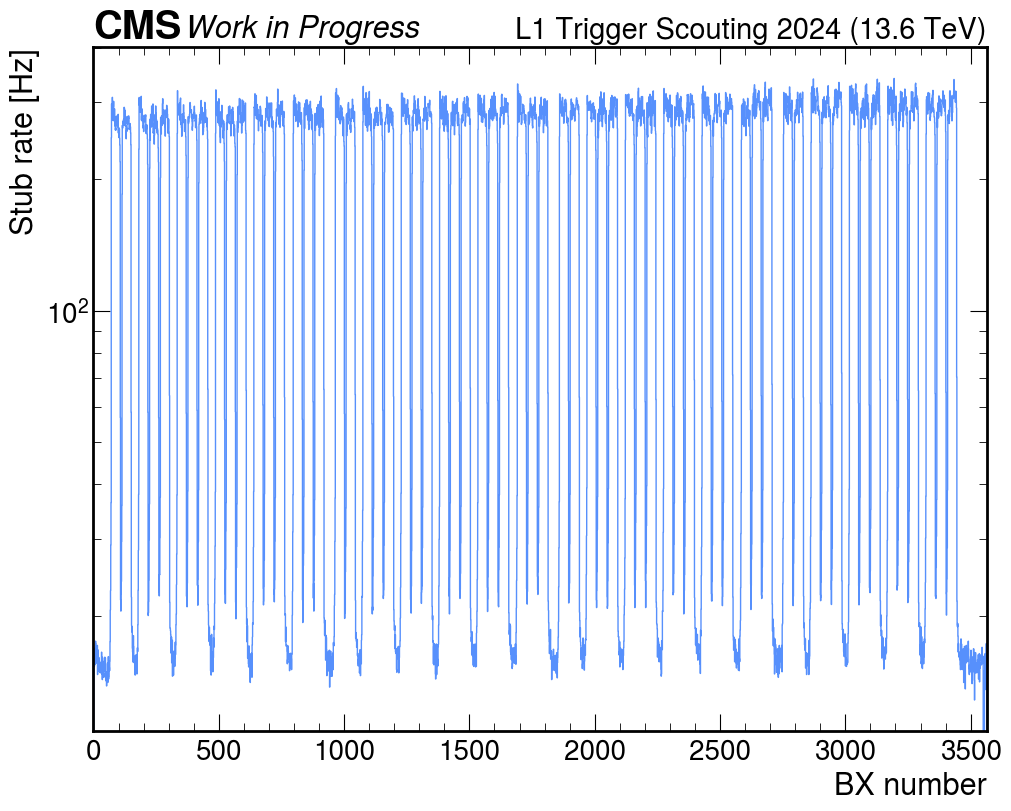

In [23]:
#Mettendo tutti i 4 set di dati indipendenti assieme:
bx_stub_counts_tot = bx_stub_counts_LS133 + bx_stub_counts_LS263 + bx_stub_counts_LS264 + bx_stub_counts_LS306

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_stub_counts_tot), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(0, ONE_ORBIT_IN_BX)
ax.set_yscale('log')

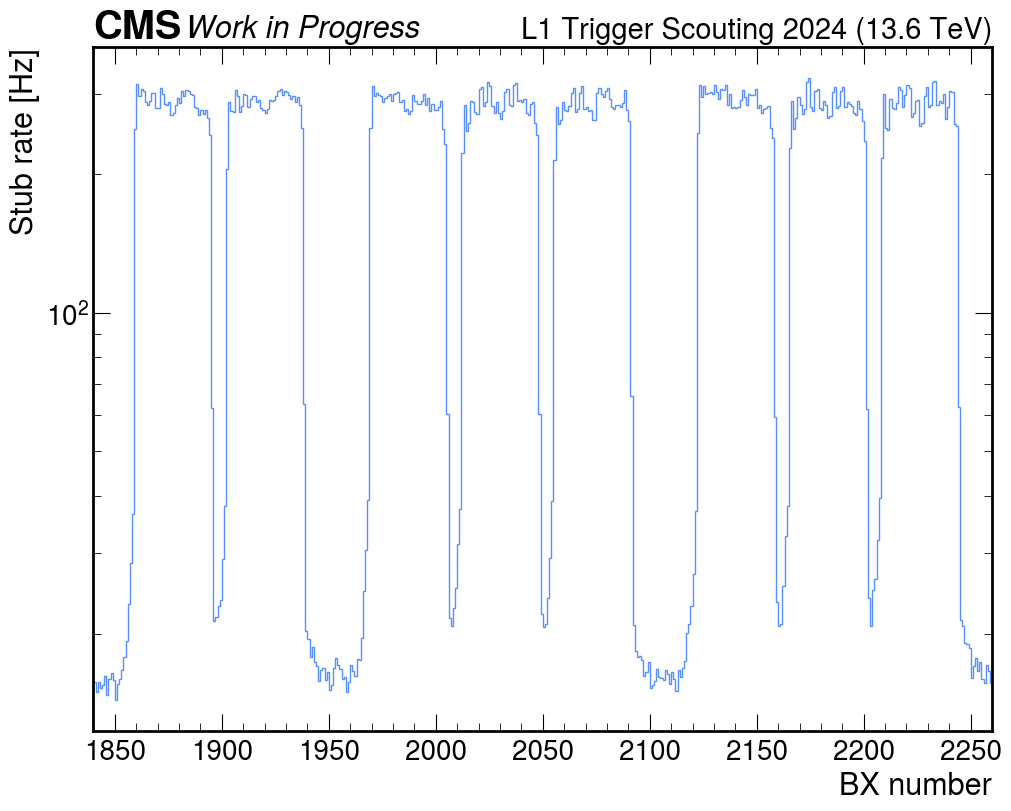

In [24]:
#Zoom in una regione con tutti i dati:

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

bx_left = 1840
bx_right = 2260

ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_stub_counts_tot[bx_left:bx_right]), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(bx_left, bx_right)
ax.set_yscale('log')

# Grafici Bidimensionali

Come prima, prima si passa a studiare singolarmente i quattro set di dati.

DOMANDA: Questo è un vettore perchè qualche muone ha attraversato sia la "wheel" i che la i+1??

 Station == 0, Sector == 1, Wheel == 2



In [25]:
#------------------------------------------LS133------------------------------------------#
StationLS133  = stubs_awk_LS133.stubStation
SectorLS133   = stubs_awk_LS133.stubSector
WheelLS133    = stubs_awk_LS133.stubWheel

CMS_LS133 = FlattenAndArray(StationLS133, SectorLS133, WheelLS133)

#------------------------------------------LS263------------------------------------------#
StationLS263  = stubs_awk_LS263.stubStation
SectorLS263   = stubs_awk_LS263.stubSector
WheelLS263    = stubs_awk_LS263.stubWheel

CMS_LS263 = FlattenAndArray(StationLS263, SectorLS263, WheelLS263)

#------------------------------------------LS264------------------------------------------#
StationLS264  = stubs_awk_LS264.stubStation
SectorLS264   = stubs_awk_LS264.stubSector
WheelLS264    = stubs_awk_LS264.stubWheel

CMS_LS264 = FlattenAndArray(StationLS264, SectorLS264, WheelLS264)

#------------------------------------------LS306------------------------------------------#
StationLS306  = stubs_awk_LS306.stubStation
SectorLS306   = stubs_awk_LS306.stubSector
WheelLS306    = stubs_awk_LS306.stubWheel

CMS_LS306 = FlattenAndArray(StationLS306, SectorLS306, WheelLS306)



In [33]:
print(len(stubs_awk_LS133.bx))
print(len(StationLS133))
print(SectorLS133)

2898488
2898488
[[7], [1], [1], [1], [8], [8], [11], ..., [10], [1, 1], [6], [3], [8], [4], [8]]


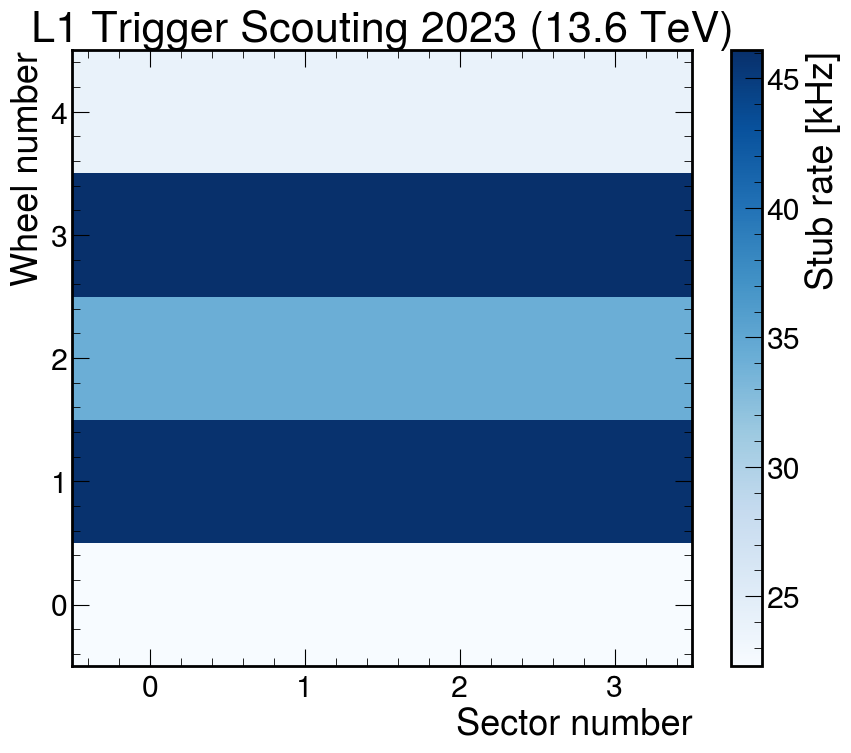

In [27]:
WheelSectorLS133 = np.meshgrid(CMS_LS133[1], CMS_LS133[2])
WheelStationLS133 = np.meshgrid(CMS_LS133[0], CMS_LS133[2])

fig, ax = plt.subplots(figsize = FIGSIZE)

cax = ax.imshow(WheelStationLS133[1], cmap='Blues', aspect='auto', interpolation='none', origin='lower')

cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Stub rate [kHz]')

ax.set_xlabel('Sector number')
ax.set_ylabel('Wheel number')

ax.set_title('L1 Trigger Scouting 2023 (13.6 TeV)')


# Mostra il grafico
plt.show()

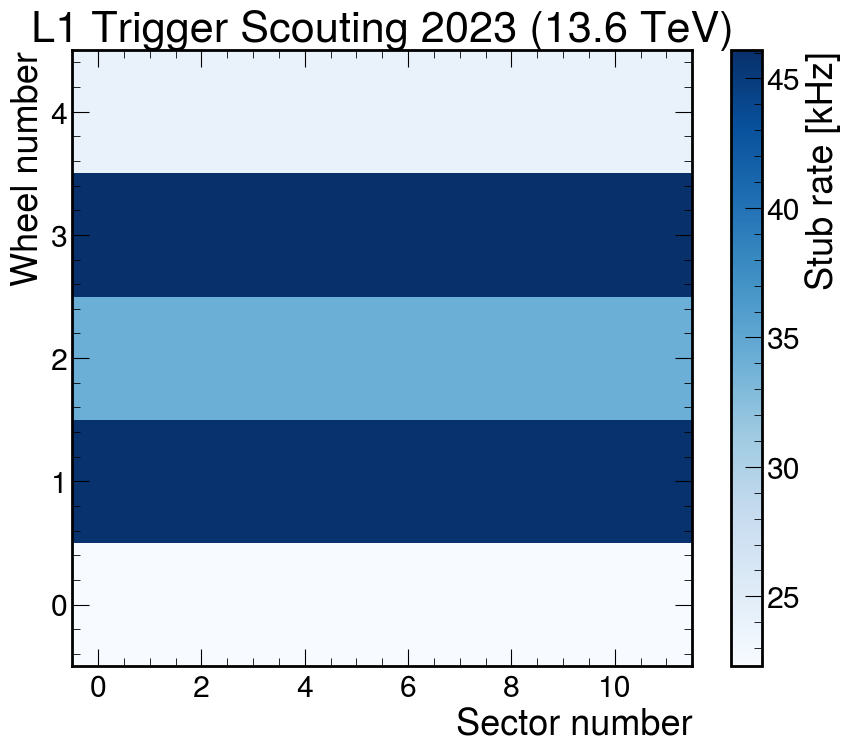

In [28]:
fig, ax = plt.subplots(figsize = FIGSIZE)

cax = ax.imshow(WheelSectorLS133[1], cmap='Blues', aspect='auto', interpolation='none', origin='lower')

cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Stub rate [kHz]')

ax.set_xlabel('Sector number')
ax.set_ylabel('Wheel number')

ax.set_title('L1 Trigger Scouting 2023 (13.6 TeV)')


# Mostra il grafico
plt.show()